<a href="https://colab.research.google.com/github/hamim23z/CSc47400/blob/main/hw2/CSC47400_HW2_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import Normalize
import xml.etree.ElementTree as ET
from IPython.display import SVG, display
import io

In [177]:
#file path. just uploaded it on my google drive and then renamed it to get rid of whitespace
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Datasets/crabs.csv"
data = np.genfromtxt(file_path, delimiter=',', names=True, dtype=None, encoding='bytes')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1899539937.py:5: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(file_path, delimiter=',', names=True, dtype=None, encoding='bytes')


In [178]:
def style_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.xaxis.set_ticks_position('bottom')

    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.5)
    ax.yaxis.set_ticks_position('left')

    ax.xaxis.set_tick_params('major', length=2, labelsize=6)
    ax.yaxis.set_tick_params('major', length=2, labelsize=6)

def combine_svg_figures(input_files, output_file, layout='horizontal', spacing=20):
    widths = []
    heights = []
    svg_contents = []

    for input_file in input_files:
        with open(input_file, 'r') as f:
            content = f.read()
            svg_contents.append(content)
        tree = ET.parse(input_file)
        root = tree.getroot()
        width = float(root.get('width', '500').replace('pt', '').replace('px', ''))
        height = float(root.get('height', '300').replace('pt', '').replace('px', ''))
        widths.append(width)
        heights.append(height)

    if layout == 'horizontal':
        total_width = sum(widths) + spacing * (len(widths) - 1)
        total_height = max(heights)
    elif layout == 'vertical':
        total_width = max(widths)
        total_height = sum(heights) + spacing * (len(heights) - 1)

    svg_output = f'<svg width="{total_width}" height="{total_height}" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n'
    x_offset = 0
    y_offset = 0
    for i, (content, width, height) in enumerate(zip(svg_contents, widths, heights)):

        start = content.find('<svg')
        start = content.find('>', start) + 1
        end = content.rfind('</svg>')
        inner_content = content[start:end]

        svg_output += f'<g transform="translate({x_offset}, {y_offset})">\n'
        svg_output += f'<text x="-15" y="15" font-size="14" font-weight="bold" font-family="sans-serif">{chr(65 + i)}</text>\n'
        svg_output += inner_content
        svg_output += '</g>\n'

        if layout == 'horizontal':
            x_offset += width + spacing
        elif layout == 'vertical':
            y_offset += height + spacing
    svg_output += '</svg>'
    with open(output_file, 'w') as f:
        f.write(svg_output)

In [179]:
groups = {
    'Blue Male': (data['sp'] == b'B') & (data['sex'] == b'M'),
    'Blue Female': (data['sp'] == b'B') & (data['sex'] == b'F'),
    'Orange Male': (data['sp'] == b'O') & (data['sex'] == b'M'),
    'Orange Female': (data['sp'] == b'O') & (data['sex'] == b'F')
}

colors_groups = {'Blue Male': '#1f77b4', 'Blue Female': '#aec7e8',
                'Orange Male': '#ff7f0e', 'Orange Female': '#ffbb78'}
markers = {'Blue Male': 'o', 'Blue Female': 's',
          'Orange Male': 'o', 'Orange Female': 's'}

Figure 1: Basic Scatter Plot of CL vs CW


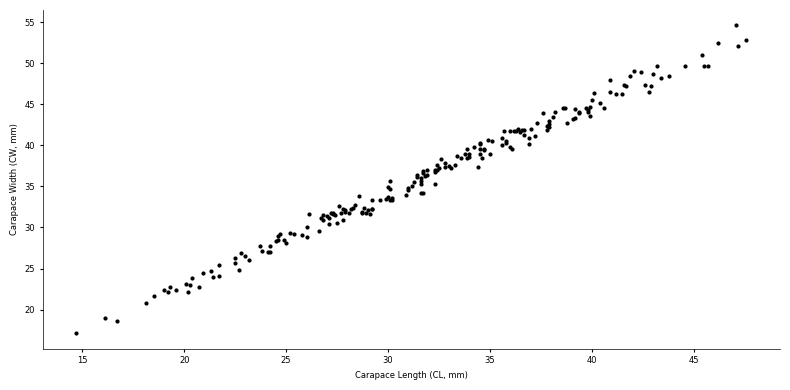

In [180]:
#this is problem 3. Modify the plot template to plot two of the above measurements against each other. Do not forget to update labels!
print("Figure 1: Basic Scatter Plot of CL vs CW")
fig1 = plt.figure(figsize=(8, 4))
gs1 = mpl.gridspec.GridSpec(1, 1)
ax1 = fig1.add_subplot(gs1[0])
style_axis(ax1)

ax1.plot(data['CL'], data['CW'], marker='.', color='k', linestyle='', markersize=4, clip_on=False)
ax1.set_xlabel('Carapace Length (CL, mm)', fontsize=6, family='sans-serif')
ax1.set_ylabel('Carapace Width (CW, mm)', fontsize=6, family='sans-serif')
ax1.autoscale_view()
plt.tight_layout()
plt.show()
fig1.savefig('crab_basic.svg')

Marker size Represents Body Depth


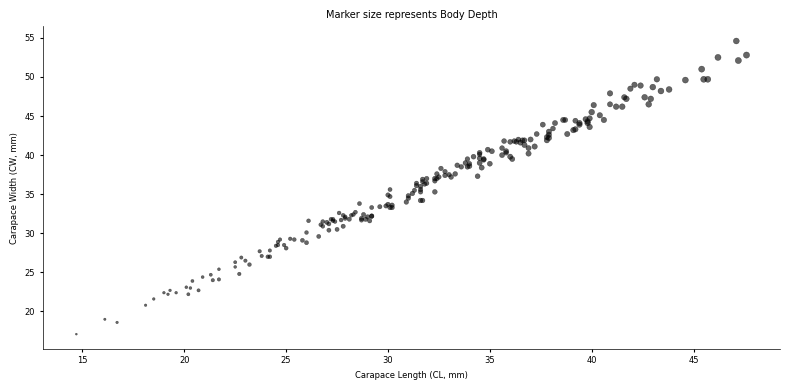

In [181]:
#this is problem 4. add a third dimension to the plot using different methods (choose two)
print("Marker size Represents Body Depth")

fig2 = plt.figure(figsize=(8, 4))
gs2 = mpl.gridspec.GridSpec(1, 1)
ax2 = fig2.add_subplot(gs2[0])
style_axis(ax2)

bd_normalized = (data['BD'] - data['BD'].min()) / (data['BD'].max() - data['BD'].min())
marker_sizes = 2 + bd_normalized * 18

ax2.scatter(data['CL'], data['CW'], s=marker_sizes, color='k',
           alpha=0.6, linewidth=0.3, edgecolors='k')
ax2.set_xlabel('Carapace Length (CL, mm)', fontsize=6, family='sans-serif')
ax2.set_ylabel('Carapace Width (CW, mm)', fontsize=6, family='sans-serif')
ax2.set_title('Marker size represents Body Depth', fontsize=7, family='sans-serif')
ax2.autoscale_view()
plt.tight_layout()
fig2.savefig('crab_markersize.svg')
plt.show()

Figure 3: Color Rear Width + Color Scale


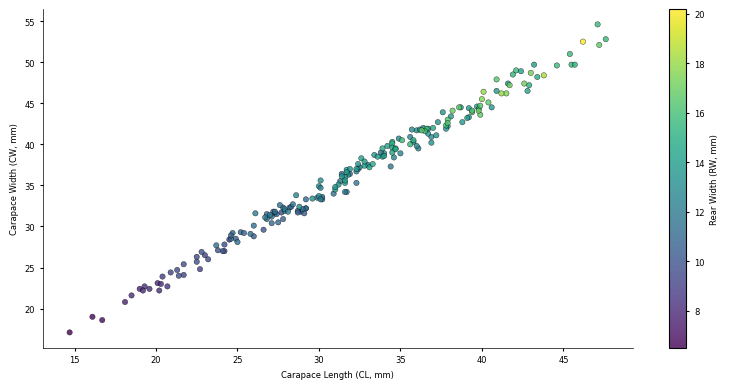

In [182]:
#this is also problem 4. the second method. here i'm usig a color scale as there's a color bar on the plot
print("Figure 3: Color Rear Width + Color Scale")

fig3 = plt.figure(figsize=(8, 4))
gs3 = mpl.gridspec.GridSpec(1, 1)
ax3 = fig3.add_subplot(gs3[0])
style_axis(ax3)

scatter = ax3.scatter(data['CL'], data['CW'], c=data['RW'], s=15, cmap='viridis', linewidth=0.3, edgecolors='k', alpha=0.8)
ax3.set_xlabel('Carapace Length (CL, mm)', fontsize=6, family='sans-serif')
ax3.set_ylabel('Carapace Width (CW, mm)', fontsize=6, family='sans-serif')

cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Rear Width (RW, mm)', fontsize=6, family='sans-serif')
cbar.ax.tick_params(labelsize=6, length=2)
plt.tight_layout()
fig3.savefig('crab_colormap.svg')
plt.show()

Figure 4: Grouping by Same Crab Group


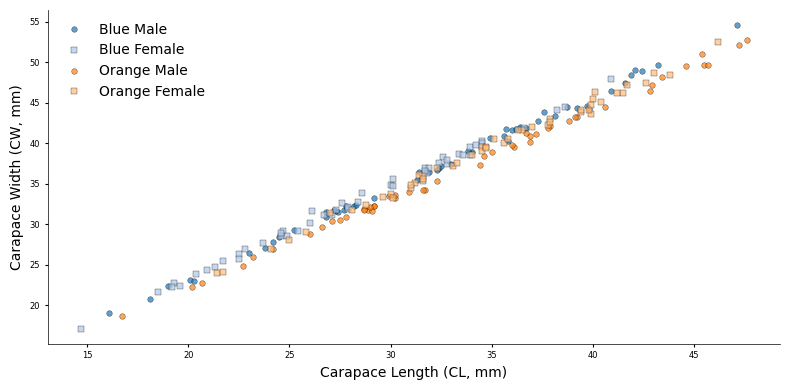

In [183]:
#this is problem 5. Group variables belonging to the same crab group (blue male, blue female, etc., choose one method)
print("Figure 4: Grouping by Same Crab Group")

fig4 = plt.figure(figsize=(8, 4))
gs4 = mpl.gridspec.GridSpec(1, 1)
ax4 = fig4.add_subplot(gs4[0])
style_axis(ax4)

for group_name, mask in groups.items():
    ax4.plot(data['CL'][mask], data['CW'][mask], marker=markers[group_name], color=colors_groups[group_name],
             linestyle='', markersize=4, label=group_name, alpha=0.7, markeredgewidth=0.3, markeredgecolor='k')
ax4.set_xlabel('Carapace Length (CL, mm)')
ax4.set_ylabel('Carapace Width (CW, mm)')
ax4.legend(frameon=False, loc='upper left')
ax4.autoscale_view()
plt.tight_layout()
fig4.savefig('crab_grouped.svg')
plt.show()

Figure 5: Multipanel Plot


/tmp/ipython-input-5488855.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


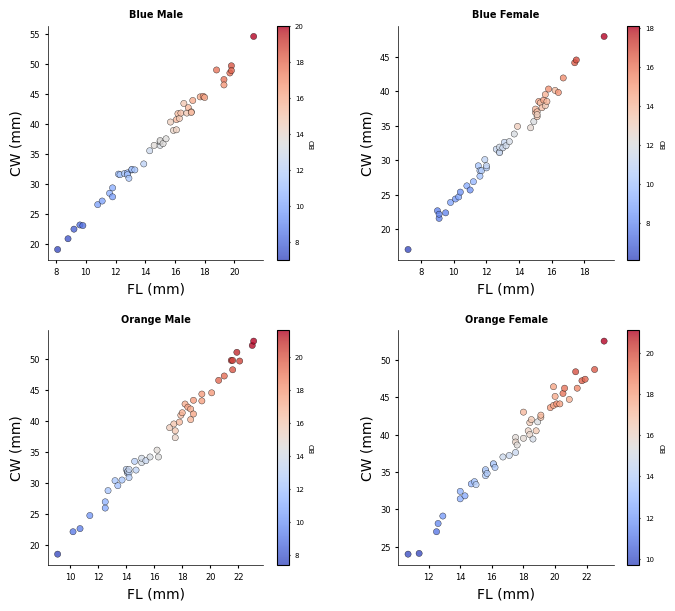

In [184]:
print("Figure 5: Multipanel Plot")
fig5 = plt.figure(figsize=(8, 7))
gs5 = mpl.gridspec.GridSpec(2, 2, hspace=0.3, wspace=0.3)
for i, (group_name, mask) in enumerate(groups.items()):
    ax = fig5.add_subplot(gs5[i])
    style_axis(ax)
    scatter = ax.scatter(data['FL'][mask], data['CW'][mask], c=data['BD'][mask], s=20, cmap='coolwarm', linewidth=0.3, edgecolors='k', alpha=0.8)
    ax.set_xlabel('FL (mm)')
    ax.set_ylabel('CW (mm)')
    ax.set_title(group_name, fontsize=7, fontweight='bold')
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('BD', fontsize=5)
    cbar.ax.tick_params(labelsize=5, length=1)
plt.tight_layout()
fig5.savefig('crab_panels.svg')
plt.show()

In [185]:
#combining and downloading
print("Combining Figures")
combine_svg_figures(
    input_files=['crab_basic.svg', 'crab_colormap.svg'],
    output_file='final_figure1.svg',
    layout='horizontal',
    spacing=30
)
combine_svg_figures(
    input_files=['crab_grouped.svg', 'crab_panels.svg'],
    output_file='final_figure2.svg',
    layout='vertical',
    spacing=30
)

from google.colab import files
files.download('crab_basic.svg')
files.download('crab_markersize.svg')
files.download('crab_colormap.svg')
files.download('crab_grouped.svg')
files.download('crab_panels.svg')
files.download('final_figure1.svg')
files.download('final_figure2.svg')

Combining Figures


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>